In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('data/spx_weeklies.csv')
data_long = pd.read_csv('data/spx_nonweeklies.csv')
spx = pd.read_csv('data/spx_prices_daily.csv')

In [3]:
data['strike_price'] = data['strike_price']/1000

In [4]:
print(data.shape, data_long.shape, spx.shape)

(3205352, 29) (4871519, 38) (3416, 7)


In [5]:
print(len(data['optionid'].unique()))

print(data['optionid'].unique())
i = 0

574548
[ 81166310  81166311  81166312 ... 152444005 152444006 152444007]


In [6]:
print(data[data['am_settlement']==1].shape)

(352058, 29)


In [7]:
i = 500

In [8]:
id = data['optionid'].unique()[i]

print(data[data['optionid']==id])
i += 1

       secid        date             symbol  symbol_flag      exdate  \
1334  108105  17/01/2012  SPX 120121P840000            1  21/01/2012   
1656  108105  18/01/2012  SPX 120121P840000            1  21/01/2012   
1978  108105  19/01/2012  SPX 120121P840000            1  21/01/2012   

       last_date cp_flag  strike_price  best_bid  best_offer  ...  \
1334  21/12/2011       P         840.0       0.0        0.05  ...   
1656  21/12/2011       P         840.0       0.0        0.05  ...   
1978  21/12/2011       P         840.0       0.0        0.05  ...   

      am_settlement  contract_size  ss_flag  forward_price  expiry_indicator  \
1334              1            100        0            NaN               NaN   
1656              1            100        0            NaN               NaN   
1978              1            100        0            NaN               NaN   

      root  suffix  index_flag              issuer  exercise_style  
1334   NaN     NaN           1  CBOE S&P 500

In [9]:
print(data[data['date'] == data['exdate']].dropna())

Empty DataFrame
Columns: [secid, date, symbol, symbol_flag, exdate, last_date, cp_flag, strike_price, best_bid, best_offer, volume, open_interest, impl_volatility, delta, gamma, vega, theta, optionid, cfadj, am_settlement, contract_size, ss_flag, forward_price, expiry_indicator, root, suffix, index_flag, issuer, exercise_style]
Index: []

[0 rows x 29 columns]


In [10]:
print(data[data['date'] == data['exdate']])

          secid        date               symbol  symbol_flag      exdate  \
324      108105  06/01/2012  SPXW 120106C1000000            1  06/01/2012   
325      108105  06/01/2012  SPXW 120106C1025000            1  06/01/2012   
326      108105  06/01/2012  SPXW 120106C1050000            1  06/01/2012   
327      108105  06/01/2012  SPXW 120106C1075000            1  06/01/2012   
328      108105  06/01/2012  SPXW 120106C1100000            1  06/01/2012   
...         ...         ...                  ...          ...         ...   
3203791  108105  28/02/2023  SPXW 230228P5000000            1  28/02/2023   
3203792  108105  28/02/2023  SPXW 230228P5100000            1  28/02/2023   
3203793  108105  28/02/2023  SPXW 230228P5200000            1  28/02/2023   
3203794  108105  28/02/2023  SPXW 230228P5300000            1  28/02/2023   
3203795  108105  28/02/2023  SPXW 230228P5400000            1  28/02/2023   

          last_date cp_flag  strike_price  best_bid  best_offer  ...  \
324

In [11]:
print(data[data['date'] == data['exdate']]['am_settlement'].unique())

[0]


In [12]:
print(data.columns)

Index(['secid', 'date', 'symbol', 'symbol_flag', 'exdate', 'last_date',
       'cp_flag', 'strike_price', 'best_bid', 'best_offer', 'volume',
       'open_interest', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta',
       'optionid', 'cfadj', 'am_settlement', 'contract_size', 'ss_flag',
       'forward_price', 'expiry_indicator', 'root', 'suffix', 'index_flag',
       'issuer', 'exercise_style'],
      dtype='object')


In [13]:
print(spx)

            Date         Open         High          Low        Close  \
0     14/01/2011  1282.900024  1293.239990  1281.239990  1293.239990   
1     18/01/2011  1293.219971  1296.060059  1290.160034  1295.020020   
2     19/01/2011  1294.520020  1294.599976  1278.920044  1281.920044   
3     20/01/2011  1280.849976  1283.349976  1271.260010  1280.260010   
4     21/01/2011  1283.630005  1291.209961  1282.069946  1283.349976   
...          ...          ...          ...          ...          ...   
3411  07/08/2024  5293.129883  5330.640137  5195.540039  5199.500000   
3412  08/08/2024  5252.569824  5328.029785  5233.850098  5319.310059   
3413  09/08/2024  5314.660156  5358.669922  5300.839844  5344.160156   
3414  12/08/2024  5351.879883  5371.200195  5324.370117  5344.390137   
3415  13/08/2024  5376.979980  5436.500000  5376.979980  5434.430176   

        Adj Close      Volume  
0     1293.239990  4661590000  
1     1295.020020  5284990000  
2     1281.920044  4743710000  
3     1

In [14]:
print(data.head())

    secid        date               symbol  symbol_flag      exdate last_date  \
0  108105  03/01/2012  SPXW 120106C1000000            1  06/01/2012       NaN   
1  108105  03/01/2012  SPXW 120106C1025000            1  06/01/2012       NaN   
2  108105  03/01/2012  SPXW 120106C1050000            1  06/01/2012       NaN   
3  108105  03/01/2012  SPXW 120106C1075000            1  06/01/2012       NaN   
4  108105  03/01/2012  SPXW 120106C1100000            1  06/01/2012       NaN   

  cp_flag  strike_price  best_bid  best_offer  ...  am_settlement  \
0       C        1000.0     275.6       278.6  ...              0   
1       C        1025.0     250.6       253.6  ...              0   
2       C        1050.0     225.6       228.6  ...              0   
3       C        1075.0     200.6       203.6  ...              0   
4       C        1100.0     175.6       178.6  ...              0   

   contract_size  ss_flag  forward_price  expiry_indicator  root  suffix  \
0            100      

In [15]:
print(data.columns)

Index(['secid', 'date', 'symbol', 'symbol_flag', 'exdate', 'last_date',
       'cp_flag', 'strike_price', 'best_bid', 'best_offer', 'volume',
       'open_interest', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta',
       'optionid', 'cfadj', 'am_settlement', 'contract_size', 'ss_flag',
       'forward_price', 'expiry_indicator', 'root', 'suffix', 'index_flag',
       'issuer', 'exercise_style'],
      dtype='object')


In [16]:
drop = []
for i in data.columns:
    print(i)
    print(data[i].unique())

    if len(data[i].unique()) == 1:
        drop.append(i)


secid
[108105]
date
['03/01/2012' '04/01/2012' '05/01/2012' ... '24/02/2023' '27/02/2023'
 '28/02/2023']
symbol
['SPXW 120106C1000000' 'SPXW 120106C1025000' 'SPXW 120106C1050000' ...
 'SPXW 230307P5000000' 'SPXW 230307P5200000' 'SPXW 230307P5400000']
symbol_flag
[1]
exdate
['06/01/2012' '13/01/2012' '21/01/2012' ... '03/03/2023' '06/03/2023'
 '07/03/2023']
last_date
[nan '29/12/2011' '30/12/2011' ... '27/02/2023' '26/02/2023' '28/02/2023']
cp_flag
['C' 'P']
strike_price
[1000. 1025. 1050. 1075. 1100. 1125. 1130. 1135. 1140. 1145. 1150. 1155.
 1160. 1165. 1170. 1175. 1180. 1185. 1190. 1195. 1200. 1205. 1210. 1215.
 1220. 1225. 1230. 1235. 1240. 1245. 1250. 1255. 1260. 1265. 1270. 1275.
 1280. 1285. 1290. 1295. 1300. 1305. 1310. 1315. 1320. 1325. 1330. 1335.
 1340. 1345. 1350. 1375. 1400. 1425. 1005. 1010. 1015. 1020. 1030. 1035.
 1040. 1045. 1055. 1060. 1065. 1070. 1080. 1085. 1090. 1095. 1105. 1110.
 1115. 1120. 1355. 1360. 1365. 1370. 1380. 1385. 1390. 1395. 1410. 1420.
 1430. 1440. 1

In [17]:
data = data.drop(columns=drop)

In [18]:
print(data.shape)
print(data.columns)

(3205352, 18)
Index(['date', 'symbol', 'exdate', 'last_date', 'cp_flag', 'strike_price',
       'best_bid', 'best_offer', 'volume', 'open_interest', 'impl_volatility',
       'delta', 'gamma', 'vega', 'theta', 'optionid', 'am_settlement',
       'expiry_indicator'],
      dtype='object')


In [19]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')
data['exdate'] = pd.to_datetime(data['exdate'], format='%d/%m/%Y')

data['maturity'] = np.busday_count(data['date'].values.astype('datetime64[D]'), data['exdate'].values.astype('datetime64[D]'))

In [20]:
spx['date'] = pd.to_datetime(spx['Date'], format='%d/%m/%Y')
spx = spx.drop(columns='Date')

In [21]:
data = pd.merge(data, spx, on='date', how='left')

In [22]:
print(data.head())

        date               symbol     exdate last_date cp_flag  strike_price  \
0 2012-01-03  SPXW 120106C1000000 2012-01-06       NaN       C        1000.0   
1 2012-01-03  SPXW 120106C1025000 2012-01-06       NaN       C        1025.0   
2 2012-01-03  SPXW 120106C1050000 2012-01-06       NaN       C        1050.0   
3 2012-01-03  SPXW 120106C1075000 2012-01-06       NaN       C        1075.0   
4 2012-01-03  SPXW 120106C1100000 2012-01-06       NaN       C        1100.0   

   best_bid  best_offer  volume  open_interest  ...  optionid  am_settlement  \
0     275.6       278.6       0              0  ...  81166310              0   
1     250.6       253.6       0              0  ...  81166311              0   
2     225.6       228.6       0              0  ...  81166312              0   
3     200.6       203.6       0              0  ...  81166313              0   
4     175.6       178.6       0              0  ...  81166314              0   

   expiry_indicator  maturity         

In [23]:
data['moneyness'] = data['Adj Close'] / data['strike_price']

In [24]:
print(data['maturity'].unique())

[3 2 1 0 5 4]


In [25]:
print(data['strike_price'].unique())
print(len(data['strike_price'].unique()))

[1000. 1025. 1050. 1075. 1100. 1125. 1130. 1135. 1140. 1145. 1150. 1155.
 1160. 1165. 1170. 1175. 1180. 1185. 1190. 1195. 1200. 1205. 1210. 1215.
 1220. 1225. 1230. 1235. 1240. 1245. 1250. 1255. 1260. 1265. 1270. 1275.
 1280. 1285. 1290. 1295. 1300. 1305. 1310. 1315. 1320. 1325. 1330. 1335.
 1340. 1345. 1350. 1375. 1400. 1425. 1005. 1010. 1015. 1020. 1030. 1035.
 1040. 1045. 1055. 1060. 1065. 1070. 1080. 1085. 1090. 1095. 1105. 1110.
 1115. 1120. 1355. 1360. 1365. 1370. 1380. 1385. 1390. 1395. 1410. 1420.
 1430. 1440. 1450. 1475.  150. 1500. 1525. 1550. 1600. 1700. 1900.  200.
  300.  350.  400.  500.  550.  575.  600.  625.  650.  675.  680.  700.
  710.  720.  725.  730.  740.  750.  760.  770.  775.  780.  785.  790.
  795.  800.  805.  810.  815.  820.  825.  830.  835.  840.  845.  850.
  855.  860.  865.  870.  875.  880.  885.  890.  895.  900.  905.  910.
  915.  920.  925.  930.  935.  940.  945.  950.  955.  960.  965.  970.
  975.  980.  985.  990.  995.  100. 1405. 1415. 14

In [26]:
# introduce moneyness instead of strike price
# Need stock price ( and 0 to 5 days ahead future price)
# or m = St / Kt (Almeida et al. )

# moneyness = ln(K/S) / (sigma_{atm} * sqrt (tau))
#m = ln(K/Fτ )√τIVatm,τ 

In [27]:
first_date = data['date'].min()
last_date = data['date'].max()

print("First Date:", first_date)
print("Last Date:", last_date)

First Date: 2012-01-03 00:00:00
Last Date: 2023-02-28 00:00:00


In [28]:
print(data['date'])

0         2012-01-03
1         2012-01-03
2         2012-01-03
3         2012-01-03
4         2012-01-03
             ...    
3205347   2023-02-28
3205348   2023-02-28
3205349   2023-02-28
3205350   2023-02-28
3205351   2023-02-28
Name: date, Length: 3205352, dtype: datetime64[ns]


In [29]:
calls = data[data['cp_flag']=='C']

In [30]:
print(calls.head())

        date               symbol     exdate last_date cp_flag  strike_price  \
0 2012-01-03  SPXW 120106C1000000 2012-01-06       NaN       C        1000.0   
1 2012-01-03  SPXW 120106C1025000 2012-01-06       NaN       C        1025.0   
2 2012-01-03  SPXW 120106C1050000 2012-01-06       NaN       C        1050.0   
3 2012-01-03  SPXW 120106C1075000 2012-01-06       NaN       C        1075.0   
4 2012-01-03  SPXW 120106C1100000 2012-01-06       NaN       C        1100.0   

   best_bid  best_offer  volume  open_interest  ...  am_settlement  \
0     275.6       278.6       0              0  ...              0   
1     250.6       253.6       0              0  ...              0   
2     225.6       228.6       0              0  ...              0   
3     200.6       203.6       0              0  ...              0   
4     175.6       178.6       0              0  ...              0   

   expiry_indicator  maturity         Open         High          Low  \
0                 w       

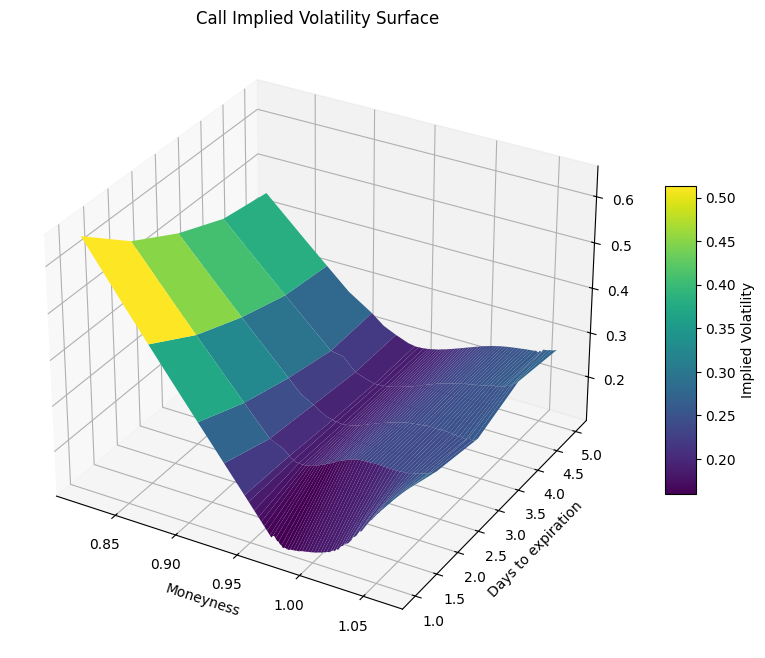

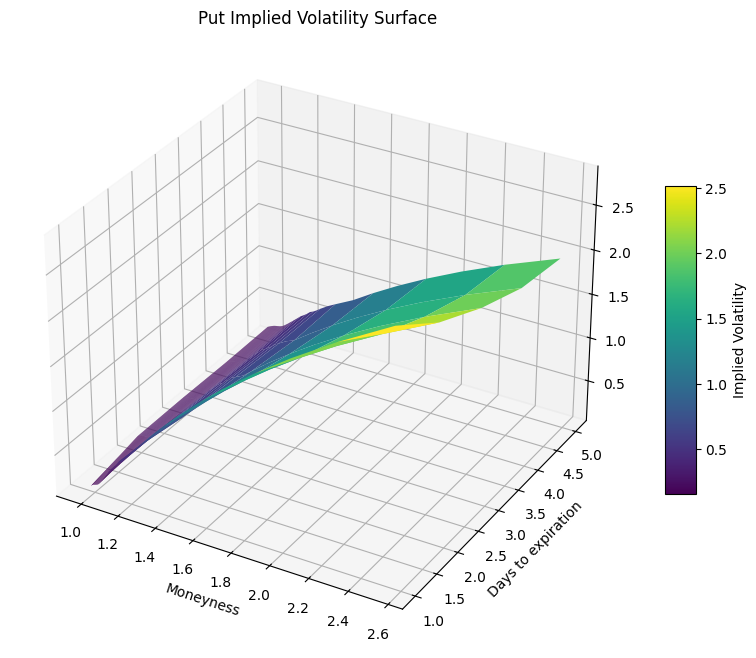

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def surface(date, option):
    # Pivot the DataFrame

    option_df = data[data['cp_flag']==option]
    option_df = option_df[option_df['date']==date]

    #print(option_df)
    surface = (
        option_df[['maturity', 'moneyness', 'impl_volatility']]
        .pivot_table(values='impl_volatility', index='moneyness', columns='maturity')
        .dropna()
    )

    # Create the figure object
    fig = plt.figure(figsize=(10, 8))

    # Add the subplot with projection argument
    ax = fig.add_subplot(111, projection='3d')

    # Get the 1D values from the pivoted DataFrame
    x, y = surface.columns.values, surface.index.values
    z = surface.values

    # Return coordinate matrices from coordinate vectors
    X, Y = np.meshgrid(x, y)

    # Set labels
    if option == 'C':
        text = 'Call'
    elif option == 'P':
        text = 'Put'
    else:
        text = 'Error'

    ax.set_xlabel('Moneyness')
    ax.set_ylabel('Days to expiration')
  
    ax.set_title(text + ' Implied Volatility Surface')

    # Plot with color map based on IV values
    surf = ax.plot_surface(Y, X, z, cmap='viridis')  # You can choose a different colormap if desired

    # Add a color bar for reference
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Implied Volatility')

    # Show the plot
    plt.show()

surface('2023-02-10', 'C')
surface('2023-02-10', 'P')

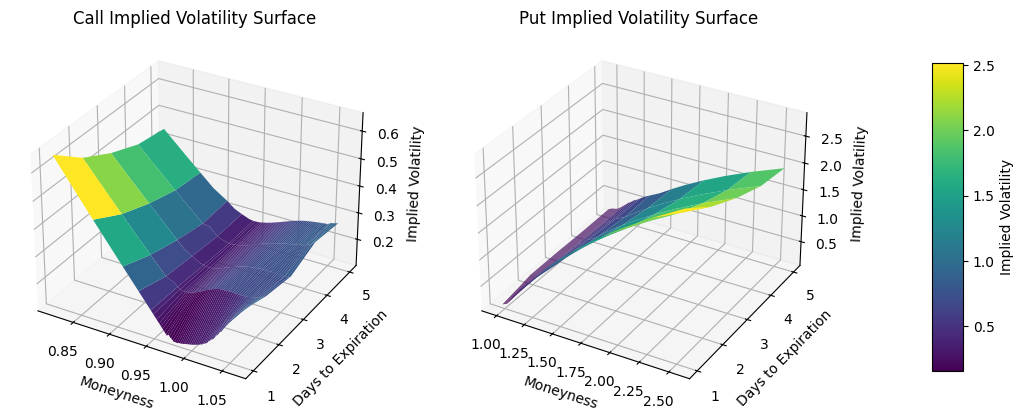

In [32]:
# Plot them side by side 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def combined_surface(date):
    # Filter data for call options
    call_df = data[(data['cp_flag'] == 'C') & (data['date'] == date)]
    call_surface = (
        call_df[['maturity', 'moneyness', 'impl_volatility']]
        .pivot_table(values='impl_volatility', index='moneyness', columns='maturity')
        .dropna()
    )

    # Filter data for put options
    put_df = data[(data['cp_flag'] == 'P') & (data['date'] == date)]
    put_surface = (
        put_df[['maturity', 'moneyness', 'impl_volatility']]
        .pivot_table(values='impl_volatility', index='moneyness', columns='maturity')
        .dropna()
    )

    fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(14, 8))

    # Get the meshgrid values for calls
    x1, y1 = call_surface.columns.values, call_surface.index.values
    z1 = call_surface.values
    X1, Y1 = np.meshgrid(x1, y1)

    # Get the meshgrid values for puts
    x2, y2 = put_surface.columns.values, put_surface.index.values
    z2 = put_surface.values
    X2, Y2 = np.meshgrid(x2, y2)

    color = 'viridis'
    # Plot the call surface
    surf1 = ax1.plot_surface(Y1, X1, z1, cmap=color)
    ax1.set_title('Call Implied Volatility Surface')
    ax1.set_xlabel('Moneyness')
    ax1.set_ylabel('Days to Expiration')
    ax1.set_zlabel('Implied Volatility')

    # Plot the put surface
    surf2 = ax2.plot_surface(Y2, X2, z2, cmap=color)
    ax2.set_title('Put Implied Volatility Surface')
    ax2.set_xlabel('Moneyness')
    ax2.set_ylabel('Days to Expiration')
    ax2.set_zlabel('Implied Volatility')

    # Add a single color bar for both subplots
    fig.colorbar(surf2, ax=[ax1, ax2], shrink=0.5, aspect=10, pad=0.1, label='Implied Volatility')

    # Show the plot
    plt.show()

# Call the function to plot for a specific date and option types
combined_surface('2023-02-10')


In [33]:
print(data[(data['date']=='2023-02-10') & (data['cp_flag'] == 'C')]['maturity'].unique())

[5 0 1 2 3 4]


In [ ]:
for i in data['date'].unique():
    print(i)
    print(data[data['date']==i]['maturity'].unique())

2012-01-03T00:00:00.000000000
[3]
2012-01-04T00:00:00.000000000
[2]
2012-01-05T00:00:00.000000000
[1]
2012-01-06T00:00:00.000000000
[0 5]
2012-01-09T00:00:00.000000000
[4]
2012-01-10T00:00:00.000000000
[3]
2012-01-11T00:00:00.000000000
[2]
2012-01-12T00:00:00.000000000
[1]
2012-01-13T00:00:00.000000000
[0]
2012-01-17T00:00:00.000000000
[4]
2012-01-18T00:00:00.000000000
[3]
2012-01-19T00:00:00.000000000
[2]
2012-01-20T00:00:00.000000000
[5]
2012-01-23T00:00:00.000000000
[4]
2012-01-24T00:00:00.000000000
[3]
2012-01-25T00:00:00.000000000
[2]
2012-01-26T00:00:00.000000000
[1]
2012-01-27T00:00:00.000000000
[0 5]
2012-01-30T00:00:00.000000000
[4]
2012-01-31T00:00:00.000000000
[3]
2012-02-01T00:00:00.000000000
[2]
2012-02-02T00:00:00.000000000
[1]
2012-02-03T00:00:00.000000000
[0 5]
2012-02-06T00:00:00.000000000
[4]
2012-02-07T00:00:00.000000000
[3]
2012-02-08T00:00:00.000000000
[2]
2012-02-09T00:00:00.000000000
[1]
2012-02-10T00:00:00.000000000
[0]
2012-02-13T00:00:00.000000000
[5]
2012-02-

In [ ]:
data2 = data.dropna(subset='impl_volatility')
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for j in years: 
    print("year: ", j)
    for i in range(6):
        print(i, len(data2[(data2['date'].dt.year == j)&(data2['maturity']==i)]) )

year:  2012
0 0
1 4432
2 4443
3 7040
4 6973
5 7466
year:  2013
0 0
1 5520
2 5548
3 8971
4 8026
5 9177
year:  2014
0 0
1 8141
2 9424
3 12110
4 12131
5 12113
year:  2015
0 0
1 11983
2 15425
3 16961
4 15632
5 17192
year:  2016
0 0
1 19531
2 24163
3 25189
4 24025
5 26553
year:  2017
0 0
1 29241
2 33939
3 35663
4 34981
5 35735
year:  2018
0 0
1 39380
2 45153
3 47429
4 46788
5 48237
year:  2019
0 0
1 41324
2 47986
3 50631
4 49623
5 50933
year:  2020
0 0
1 52877
2 63305
3 65491
4 65164
5 64887
year:  2021
0 0
1 60674
2 70872
3 74465
4 72438
5 75117
year:  2022
0 0
1 64102
2 75634
3 78419
4 76924
5 78672


In [ ]:
for j in years: 
    print("year: ", j)
    for i in range(6):
        print(i, len(data[(data['date'].dt.year == j)&(data['maturity']==i)]) )

year:  2012
0 5724
1 5602
2 9770
3 9608
4 9120
5 9472
year:  2013
0 7602
1 7206
2 11744
3 12044
4 11120
5 11864
year:  2014
0 11994
1 11270
2 16492
3 16933
4 15798
5 16085
year:  2015
0 17348
1 21262
2 22125
3 22533
4 20587
5 21822
year:  2016
0 27846
1 32410
2 32718
3 33745
4 30958
5 33244
year:  2017
0 41568
1 45112
2 45498
3 46692
4 44508
5 45190
year:  2018
0 55852
1 60178
2 60026
3 60397
4 58954
5 59829
year:  2019
0 60092
1 64266
2 64180
3 65598
4 62946
5 64048
year:  2020
0 76700
1 82246
2 82744
3 82748
4 79690
5 78752
year:  2021
0 86416
1 92636
2 93494
3 93940
4 91046
5 91214
year:  2022
0 92880
1 97556
2 97432
3 96626
4 92200
5 92666


In [ ]:
print(len(data['optionid'].unique()))

574548


In [ ]:
print(data.shape[0])

3205352


In [ ]:
print(data.shape[0]/len(data['optionid'].unique()))

5.578910726344883


In [ ]:
for i in range(6):
    print(i)

0
1
2
3
4
5


In [ ]:
print(data[data['am_settlement']==1][['date', 'exdate', 'maturity']])

              date     exdate  maturity
1044    2012-01-17 2012-01-21         4
1045    2012-01-17 2012-01-21         4
1046    2012-01-17 2012-01-21         4
1047    2012-01-17 2012-01-21         4
1048    2012-01-17 2012-01-21         4
...            ...        ...       ...
3188501 2023-02-16 2023-02-17         1
3188502 2023-02-16 2023-02-17         1
3188503 2023-02-16 2023-02-17         1
3188504 2023-02-16 2023-02-17         1
3188505 2023-02-16 2023-02-17         1

[352058 rows x 3 columns]


In [ ]:
pd.set_option('display.max_row', 300)

In [ ]:
print(data[data['am_settlement']==1]['maturity'].unique())

[4 3 2 5 1]


In [ ]:
print(data[(data['am_settlement']==1) & (data['maturity']==1) ]['impl_volatility'].unique())

[nan]


In [ ]:
data_adj = data.copy()

In [ ]:
data_adj.loc[data_adj['am_settlement']==1, 'maturity'] -=1

In [ ]:
print(data_adj[data_adj['am_settlement']==1]['maturity'].unique())

[3 2 1 4 0]


In [ ]:
# PREPROCESS
data_adj['midpoint'] = ( data_adj['best_bid'] + data_adj['best_offer'] ) /2 

data_adj = data_adj[data_adj['volume']!= 0]
data_adj = data_adj[data_adj['midpoint'] > 0.125]
data_adj = data_adj[data_adj['best_bid'] != 0]
data_adj = data_adj.dropna(subset='impl_volatility')

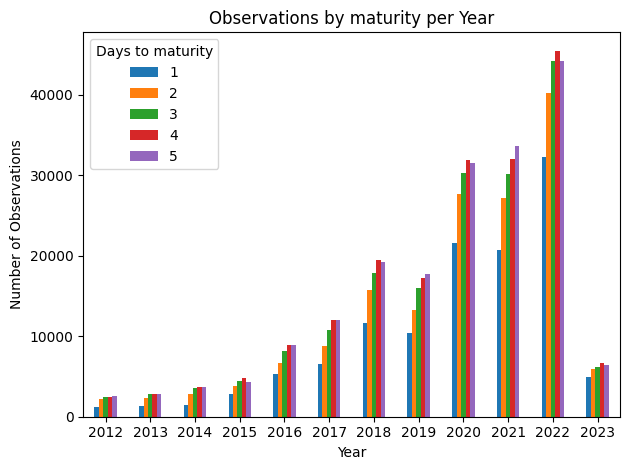

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame
# Extract year from the date
data_adj['year'] = data_adj['date'].dt.year

# Count occurrences of each value per year
counts = data_adj.groupby(['year', 'maturity']).size().unstack(fill_value=0)

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Colors for values 1 to 5
counts.plot(kind='bar', stacked=False, color=colors)

# Formatting the plot
plt.title('Observations by maturity per Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Days to maturity', labels=['1', '2', '3', '4', '5'])
plt.tight_layout()
plt.show()


In [ ]:
print(len(data_adj[(data_adj['year'] == 2012) & (data_adj['maturity']==4)]))

2510


In [ ]:
print(data_adj.shape)
print(len(data_adj['optionid'].unique()))

(828036, 28)
267600


In [ ]:
print(data[data['maturity']==0]['impl_volatility'].unique())

[nan]


In [ ]:
df=  data[data['maturity']==1].copy()

In [ ]:

def get_stats(df):
    calls = df[df['cp_flag']=='C']
    puts = df[df['cp_flag']=='P']
    print("calls obs",len(calls))
    print("puts obs", len(puts))
    
    print("call mean",np.mean(calls['impl_volatility']))
    print("put mean", np.mean(puts['impl_volatility']))
    print("call std", np.std(calls['impl_volatility']))
    print("put std", np.std(puts['impl_volatility'])) 
    print()

df1=  data_adj[data_adj['maturity']==1].copy()
df2=  data_adj[data_adj['maturity']==2].copy()
df3=  data_adj[data_adj['maturity']==3].copy()
df4=  data_adj[data_adj['maturity']==4].copy()
df5=  data_adj[data_adj['maturity']==5].copy()
get_stats(df1)
get_stats(df2)
get_stats(df3)
get_stats(df4)
get_stats(df5)
get_stats(data_adj)

calls obs 51079
puts obs 68997
call mean 0.3445349448892892
put mean 0.3564893274490195
call std 0.32709783837550693
put std 0.2886469002217632

calls obs 62375
puts obs 94052
call mean 0.2825658119599198
put mean 0.331030071035172
call std 0.24605652850989526
put std 0.23381850776386373

calls obs 67886
puts obs 109026
call mean 0.23350803715051702
put mean 0.30664246947517104
call std 0.18079741022685317
put std 0.20620451532733527

calls obs 71189
puts obs 116386
call mean 0.21702974875331865
put mean 0.29767422133246263
call std 0.1574762674338822
put std 0.1844767212984134

calls obs 69365
puts obs 117681
call mean 0.20010261731420748
put mean 0.2806056229892676
call std 0.1326145119143288
put std 0.15869390690517413

calls obs 321894
puts obs 506142
call mean 0.24978942886478156
put mean 0.3098533583203923
call std 0.21756728372646927
put std 0.21206558975022935



In [ ]:
print(data_adj.head())

In [ ]:
data_adj.to_excel("data/before_pre/data_adj.xlsx")

MemoryError: 